# **Part 1**

# **INTRUDUCTION**


**This Worldmeters dataset contains current estimates (live population clocks), historical data and projected figures for countries and dependent territories around the world. The data is based on the latest estimates from the United Nations Population Division.**

**Variable Explanation:**
1. **'#'** - Serial No.

2. **Country (or dependency)** - Name of countries and dependent territories.

3. **Population (2020)** - Population in the year 2020.

4. **Yearly Change** - Percentage Yearly Change in Population.

5. **Net Change** - Net Change in Population.

6. **Density (P/Km²)** - Population density (population per square km).

7. **Land Area (Km²)** - Land area of countries / dependent territories.

8. **Migrants (net)** - Total number of migrants.

9. **Fert. Rate** -  Fertility rate of the population.

10. **Med. Age** - Median age of the population

11. **Urban Pop %** -  Percentage of urban population

12. **World Share** -  Population share

## Required Libraries

In [137]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
#Connecting to the server and extracting the html content of the webpage
res = requests.get("https://www.worldometers.info/world-population/population-by-country/")
print(res)

<Response [200]>


we got the 200 response header mean we got succesfully connected to server and retrieved the data from website

In [139]:
#Extracting the required information the from the responce html data using BeautifulSoup

soup = BeautifulSoup(res.content,'html.parser') # so we working with html elements so that using html.pasrser to extract the html content 
table  = soup.find("table",{"id":"example2"}) # extracting the table from the webpage
print(table)

<table cellspacing="0" class="table table-striped table-bordered" id="example2" width="100%"> <thead> <tr> <th>#</th> <th>Country (or dependency)</th> <th>Population<br/> (2020)</th> <th>Yearly<br/> Change</th> <th>Net<br/> Change</th> <th>Density<br/> (P/Km²)</th> <th>Land Area<br/> (Km²)</th> <th>Migrants<br/> (net)</th> <th>Fert.<br/> Rate</th> <th>Med.<br/> Age</th> <th>Urban<br/> Pop %</th> <th>World<br/> Share</th> </tr> </thead> <tbody> <tr> <td>1</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/china-population/">China</a></td> <td style="font-weight: bold;">1,439,323,776</td> <td>0.39 %</td> <td>5,540,090</td> <td>153</td> <td>9,388,211</td> <td>-348,399</td> <td>1.7</td> <td>38</td> <td>61 %</td> <td>18.47 %</td> </tr> <tr> <td>2</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/india-population/">India</a></td> <td style="font-weight: bold;">1,380,004,385</td> <td>0.99 %</td> <td>13,58

We successfully extracted whole table content from html data now need to divide the columns and rows - in table columns name represent in tag th and rows name represent in tag tr

In [140]:
#Extracting the th tags (Column) from table data
th = table.find_all('th')
column = []
for i in th:
    column.append(i.text)
column

['#',
 'Country (or dependency)',
 'Population (2020)',
 'Yearly Change',
 'Net Change',
 'Density (P/Km²)',
 'Land Area (Km²)',
 'Migrants (net)',
 'Fert. Rate',
 'Med. Age',
 'Urban Pop %',
 'World Share']

In [141]:
#Extracting the tr tags (rows) from table data 
tr = table.find_all('tr')
rows = [] # this list is to save the rows from table
for h in range(1,len(tr)):
  td = tr[h].find_all('td') # extracting the td rows inside the tr tag.
  row = [s.text for s in td]
  rows.append(row)

In [142]:
#Creating the DataFrame by using the columns aand rows 
df = pd.DataFrame(rows,columns =column)

In [143]:
df.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [144]:
#Displaying the information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        235 non-null    object
 1   Country (or dependency)  235 non-null    object
 2   Population (2020)        235 non-null    object
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density (P/Km²)          235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           235 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: object(12)
memory usage: 22.2+ KB


## **1.Please report the number of rows and columns**

In [145]:
df.shape

(235, 12)

**Observation:** there are 235 rows and 12 columns

## **2.Please report if there is any missing value in the dataset. (Do not remove or fill it)**

In [146]:
df.isnull().sum()

#                          0
Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

**observation:** 
1.Created the data frame by using scraped data and also it showing that there is no null value but there are empty spaces and N.A. wrong formated data inside the dataset and they can be considered as Missing values to.

In [147]:
#Formating the empty and N.A. data to null 
df= df.replace([" ","N.A."],np.nan)

In [148]:
df.isnull().sum()

#                           0
Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                13
World Share                 0
dtype: int64

**Observation:**
1. There are Missing values in columns Migrants (net),Fert. Rate ,Med. Age,Urban Pop %

# **Data Cleaning and Data Fixing**

In [149]:
#Checking for duplicate value in df
df.duplicated().sum()

0

## **3.Please rename the columns appropriately.**

In [150]:
#Changing the columns names
df.columns = ['S.no','Country','Population','Yearly Change(%)','Net Change','Density','Land Area','Migrants','Fertility rate','Median Age','Urban population(%)','World Share(%)']

In [151]:
# Changed columns names
df.columns

Index(['S.no', 'Country', 'Population', 'Yearly Change(%)', 'Net Change',
       'Density', 'Land Area', 'Migrants', 'Fertility rate', 'Median Age',
       'Urban population(%)', 'World Share(%)'],
      dtype='object')

In [152]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   S.no                 235 non-null    object
 1   Country              235 non-null    object
 2   Population           235 non-null    object
 3   Yearly Change(%)     235 non-null    object
 4   Net Change           235 non-null    object
 5   Density              235 non-null    object
 6   Land Area            235 non-null    object
 7   Migrants             201 non-null    object
 8   Fertility rate       201 non-null    object
 9   Median Age           201 non-null    object
 10  Urban population(%)  222 non-null    object
 11  World Share(%)       235 non-null    object
dtypes: object(12)
memory usage: 22.2+ KB


In [153]:
#Checking the Null values
df.isnull().sum()

S.no                    0
Country                 0
Population              0
Yearly Change(%)        0
Net Change              0
Density                 0
Land Area               0
Migrants               34
Fertility rate         34
Median Age             34
Urban population(%)    13
World Share(%)          0
dtype: int64

In [154]:
df.head()

,S.no,Country,Population,Yearly Change(%),Net Change,Density,Land Area,Migrants,Fertility rate,Median Age,Urban population(%),World Share(%)
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


**Observation:**
1. Python should some of the Columns such as S.no ,Population ,Yearly Charges,Net Charges , Density, Land Area , Migrants , Fertility rate , Median age , Urban Population , World Share - should need to be in Int and float respectively but they read as String in Python.

2. In those columns, some of the Columns such as Population ,Yearly Charges,Net Charges, Land Area , Migrants , Urban Population , World Share they have some symbols like ',' '%' so need to remove them

3. There are null value.

In [155]:
#Deleting the ',' '%' from Population ,Yearly Charges,Net Charges, Land Area , Migrants , Urban Population , World Share
df2 = df.replace([',','%'],'',regex=True)

In [156]:
df2.head()

,S.no,Country,Population,Yearly Change(%),Net Change,Density,Land Area,Migrants,Fertility rate,Median Age,Urban population(%),World Share(%)
0,1,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83


In [157]:
df2.tail()

,S.no,Country,Population,Yearly Change(%),Net Change,Density,Land Area,Migrants,Fertility rate,Median Age,Urban population(%),World Share(%)
230,231,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10,0.00
231,232,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66,0.00
232,233,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46,0.00
233,234,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0,0.00
234,235,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.00


**Going forward to amalysis part, we have null value in few columns,and replacing them with 0 because each and every row is representing the each and every county and can't deleted null value rows beasuse they are country data from the dataset and also we can't use mean , median or mode to fill the values because evch and every row serves as indipendent data so, replacing the Null values with 0 will be best option.**

In [158]:
#filling null values with 0
df2 = df2.dropna()

In [159]:
#Converting the below columns in to int and float
colInt = ['S.no','Population','Net Change','Density','Land Area','Migrants','Median Age','Urban population(%)']
colFlot = ['Yearly Change(%)','Fertility rate','World Share(%)']


for i in colInt:
  df2[i] = df2[i].astype("int")

for j in colFlot:
  df2[j] = df2[j].astype("float")

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 200
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.no                 194 non-null    int64  
 1   Country              194 non-null    object 
 2   Population           194 non-null    int64  
 3   Yearly Change(%)     194 non-null    float64
 4   Net Change           194 non-null    int64  
 5   Density              194 non-null    int64  
 6   Land Area            194 non-null    int64  
 7   Migrants             194 non-null    int64  
 8   Fertility rate       194 non-null    float64
 9   Median Age           194 non-null    int64  
 10  Urban population(%)  194 non-null    int64  
 11  World Share(%)       194 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 19.7+ KB


# **EDA(Exploratory Data Analysis)**

## **4.Please report the top ten and bottom ten countries based on the density column.**

In [161]:
#Extracting the top 10 rows based on Density data
print("Below are Top 10 countries based on Density Columns")
print()
Lcountry = df2.nlargest(10,'Density')['Country']
Ldensity = df2.nlargest(10,'Density')['Density']

print(Lcountry)

Below are Top 10 countries based on Density Columns

151               Bahrain
173              Maldives
174                 Malta
7              Bangladesh
190       Channel Islands
120    State of Palestine
172            Micronesia
186               Mayotte
56                 Taiwan
183              Barbados
Name: Country, dtype: object


Text(0, 0.5, 'Density')

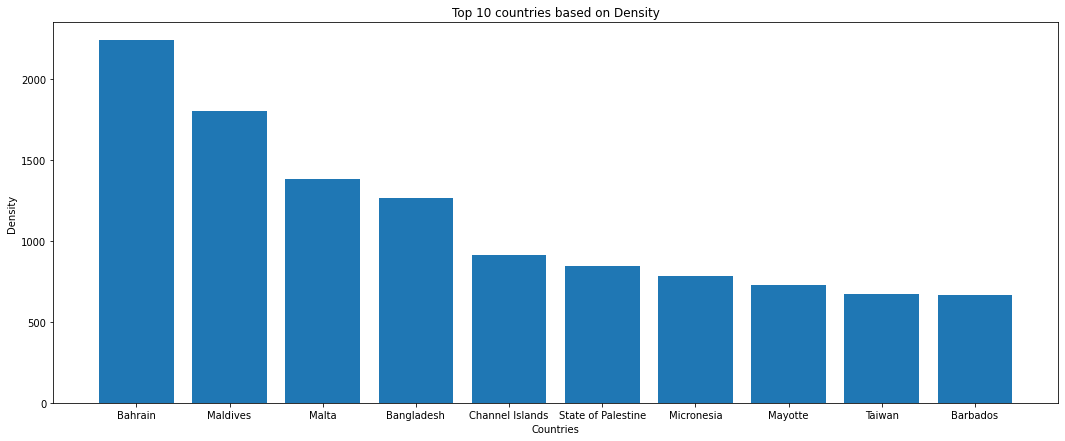

In [162]:
plt.figure(figsize=(18, 7))
plt.bar(Lcountry,Ldensity)
plt.title('Top 10 countries based on Density')
plt.xlabel("Countries")
plt.ylabel("Density")

In [163]:
#Extracting the Bottom 10 rows based on Density data
print("Below are Bottom 10 countries based on Density Columns")
print()
Scountry = df2.nsmallest(10,'Density')['Country']
SDensity = df2.nsmallest(10,'Density')['Density']
print(Scountry)

Below are Bottom 10 countries based on Density Columns

135          Mongolia
169    Western Sahara
54          Australia
142           Namibia
180           Iceland
38             Canada
107             Libya
144          Botswana
163            Guyana
170          Suriname
Name: Country, dtype: object


Text(0, 0.5, 'Density')

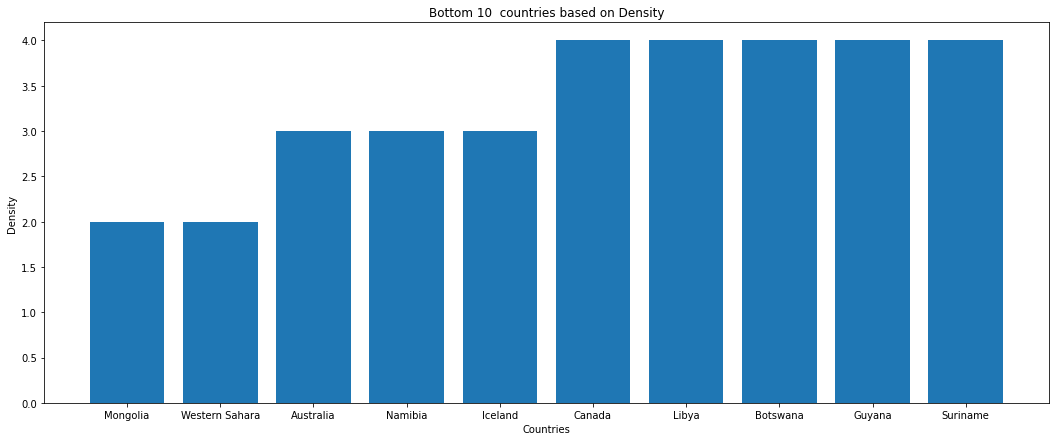

In [164]:
plt.figure(figsize=(18, 7))
plt.bar(Scountry,SDensity)
plt.title('Bottom 10  countries based on Density')
plt.xlabel("Countries")
plt.ylabel("Density")

## **5.Which country has the highest fertility rate and which country has the lowest fertility rate? Please report the top 10 countries and bottom 10 countries.**

### **5.1 Which country has the highest fertility rate and which country has the lowest fertility rate ?**

In [165]:
#Higest
Higest_country = df2[df2['Fertility rate'] == df2['Fertility rate'].max()].values[0][1]
Hcount = df2['Fertility rate'].max()

print(f"The Higest Fertility country is {Higest_country} with {Hcount} Fertility rate ")

The Higest Fertility country is Niger with 7.0 Fertility rate 


In [166]:
#Lowest
print(f"Lowest fertility rate is {df2['Fertility rate'].min()}")
print()
print("Below are countries which have lowest fertility rate ")
print()

df2[df2['Fertility rate'] == df2['Fertility rate'].min()]['Country']


Lowest fertility rate is 1.1

Below are countries which have lowest fertility rate 



27    South Korea
Name: Country, dtype: object

### **5.2 Please report the top 10 countries and bottom 10 countries**

In [167]:
print("Below are Top 10 countries based on Fertility rate Columns")
print()
Lfed_rate = df2.nlargest(10,'Fertility rate')['Fertility rate']
LFcountries = df2.nlargest(10,'Fertility rate')['Country']

print(LFcountries)

Below are Top 10 countries based on Fertility rate Columns

55            Niger
72          Somalia
15         DR Congo
59             Mali
71             Chad
43           Angola
77          Burundi
6           Nigeria
143          Gambia
58     Burkina Faso
Name: Country, dtype: object


Text(0, 0.5, 'Fertility rate')

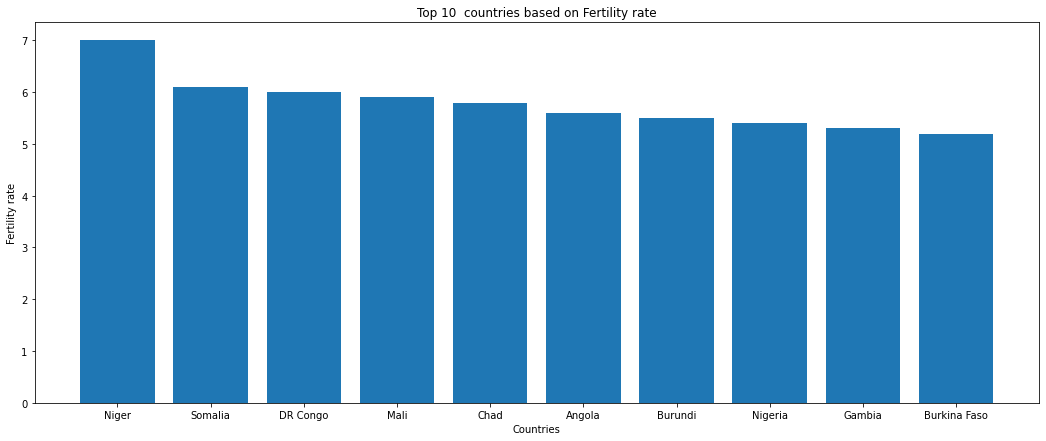

In [168]:
plt.figure(figsize=(18, 7))
plt.bar(LFcountries,Lfed_rate)
plt.title('Top 10  countries based on Fertility rate')
plt.xlabel("Countries")
plt.ylabel("Fertility rate")

In [169]:
print("Below are Bottom 10 countries based on Fertility rate Columns")
print()
SFcountries = df2.nsmallest(10,'Fertility rate')['Country']
Sfed_rate = df2.nsmallest(10,'Fertility rate')['Fertility rate']
print(SFcountries)

Below are Bottom 10 countries based on Fertility rate Columns

27                South Korea
56                     Taiwan
22                      Italy
29                      Spain
86                     Greece
88                   Portugal
130                   Moldova
134    Bosnia and Herzegovina
157                    Cyprus
10                      Japan
Name: Country, dtype: object


Text(0, 0.5, 'Fertility rate')

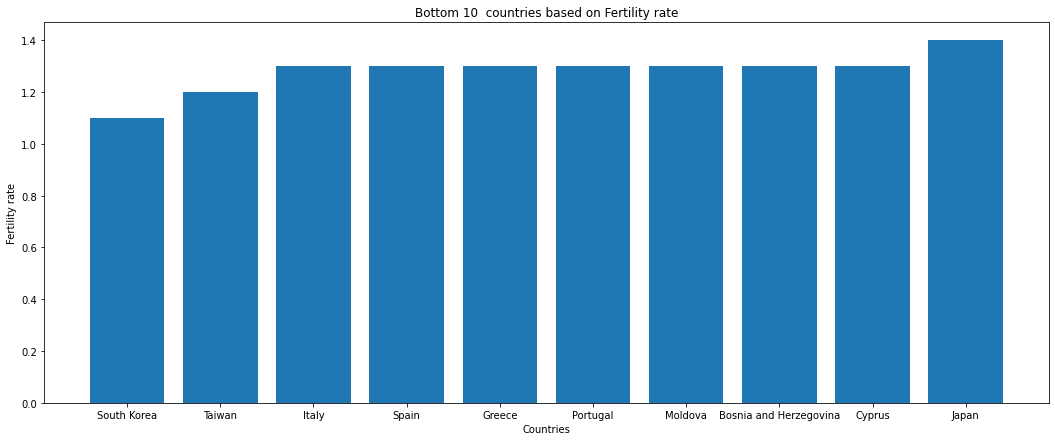

In [170]:
plt.figure(figsize=(18, 7))
plt.bar(SFcountries,Sfed_rate)
plt.title('Bottom 10  countries based on Fertility rate')
plt.xlabel("Countries")
plt.ylabel("Fertility rate")

## **6.Report top 5 largest countries in this word based on land area.**

In [171]:
print("Below are Top 5 Largest countries based on Land area")
print()
Lacountry = df2.nlargest(5,'Land Area')['Country']
land_area = df2.nlargest(5,'Land Area')['Land Area']
print(Lacountry)

Below are Top 5 Largest countries based on Land area

8            Russia
0             China
2     United States
38           Canada
5            Brazil
Name: Country, dtype: object


Text(0, 0.5, 'Land area')

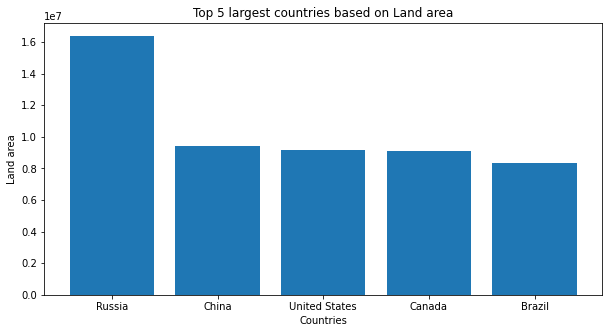

In [172]:
plt.figure(figsize=(10, 5))
plt.bar(Lacountry,land_area)
plt.title('Top 5 largest countries based on Land area')
plt.xlabel("Countries")
plt.ylabel("Land area")

## **7.Report top 5 countries in this word based on a median age.**

In [173]:
print("Below are Top 5 Largest countries based on Median Age")
Mcountry = df2.nlargest(5,'Median Age')['Country']
Median_value = df2.nlargest(5,'Median Age')['Median Age']
print(Mcountry)

Below are Top 5 Largest countries based on Median Age
10          Japan
22          Italy
179    Martinique
18        Germany
86         Greece
Name: Country, dtype: object


Text(0, 0.5, 'Median age')

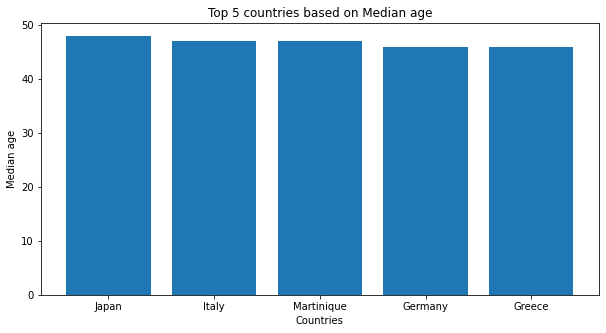

In [174]:
plt.figure(figsize=(10, 5))
plt.bar(Mcountry,Median_value)
plt.title('Top 5 countries based on Median age')
plt.xlabel("Countries")
plt.ylabel("Median age")

## **8.Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the Population')

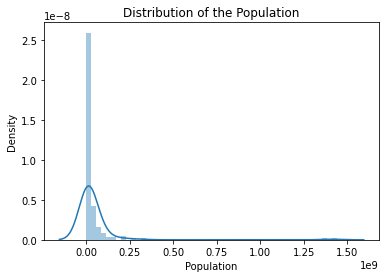

In [175]:
#Creating distibution plot for population
sns.distplot(df2['Population']) 
plt.title("Distribution of the Population")

**Observation:**
1. By looking at the above distibution plot it have Right-Skewed Distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the Median Age')

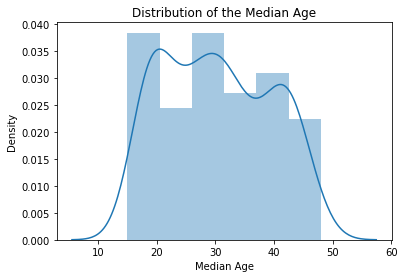

In [176]:
#Creating distibution plot for Median Age
sns.distplot(df2['Median Age']) 
plt.title("Distribution of the Median Age")

**Observation:**
1. By looking at the above distibution plot it have Left-Skewed Distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the Urban population')

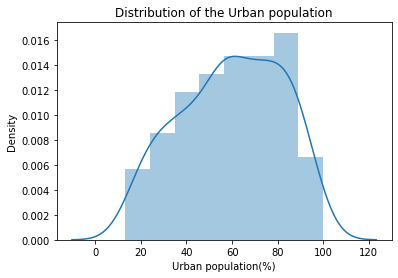

In [177]:
#Creating distibution plot for Urban population
sns.distplot(df2['Urban population(%)'])
plt.title("Distribution of the Urban population")

**Observation:**
1. By looking at the above distibution plot it have Left-Skewed Distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the Yearly Change')

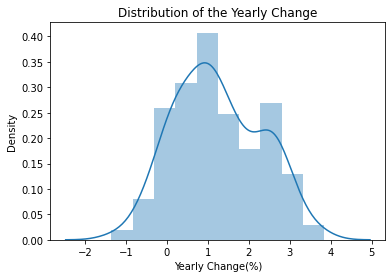

In [178]:
#Creating distibution plot for Yearly change
sns.distplot(df2['Yearly Change(%)'])
plt.title("Distribution of the Yearly Change")

**Observation:**
1. By looking at the above distibution plot it have Left-Skewed Distribution.

## **9.Please sort the population column based on the lowest populated countries and report the bottom 10 countries as well as the top 10 countries.**

In [179]:
df3 = df2.copy()

In [180]:
#Sorting the dataset based on lowest population
df3 = df3.sort_values(by=['Population'])

In [181]:
df3.head()

,S.no,Country,Population,Yearly Change(%),Net Change,Density,Land Area,Migrants,Fertility rate,Median Age,Urban population(%),World Share(%)
200,201,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26,0.0
199,200,Seychelles,98347,0.62,608,214,460,-200,2.5,34,56,0.0
198,199,U.S. Virgin Islands,104425,-0.15,-153,298,350,-451,2.0,43,96,0.0
197,198,Tonga,105695,1.15,1201,147,720,-800,3.6,22,24,0.0
196,197,Aruba,106766,0.43,452,593,180,201,1.9,41,44,0.0


Succesfully sorted the dataset

In [182]:
print("Below are Top 10 countries")
print()
LPcountry = df3.nlargest(10,'Population')['Country']
Lpopulation = df3.nlargest(10,'Population')['Population']
print(LPcountry)

Below are Top 10 countries

0            China
1            India
2    United States
3        Indonesia
4         Pakistan
5           Brazil
6          Nigeria
7       Bangladesh
8           Russia
9           Mexico
Name: Country, dtype: object


Text(0, 0.5, 'Population')

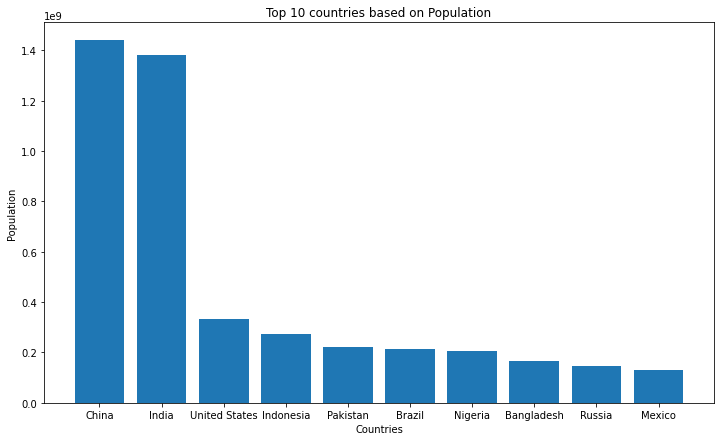

In [183]:
plt.figure(figsize=(12, 7))
plt.bar(LPcountry,Lpopulation)
plt.title('Top 10 countries based on Population')
plt.xlabel("Countries")
plt.ylabel("Population")

In [184]:
print("Below are Bottom 10 countries")
print()
SPcountry = df3.nsmallest(10,'Population')['Country']
Spopulation = df3.nsmallest(10,'Population')['Population']
print(SPcountry)

Below are Bottom 10 countries

200         Antigua and Barbuda
199                  Seychelles
198         U.S. Virgin Islands
197                       Tonga
196                       Aruba
195    St. Vincent & Grenadines
194                     Grenada
193                    Kiribati
192                     Curaçao
191                        Guam
Name: Country, dtype: object


Text(0, 0.5, 'Population')

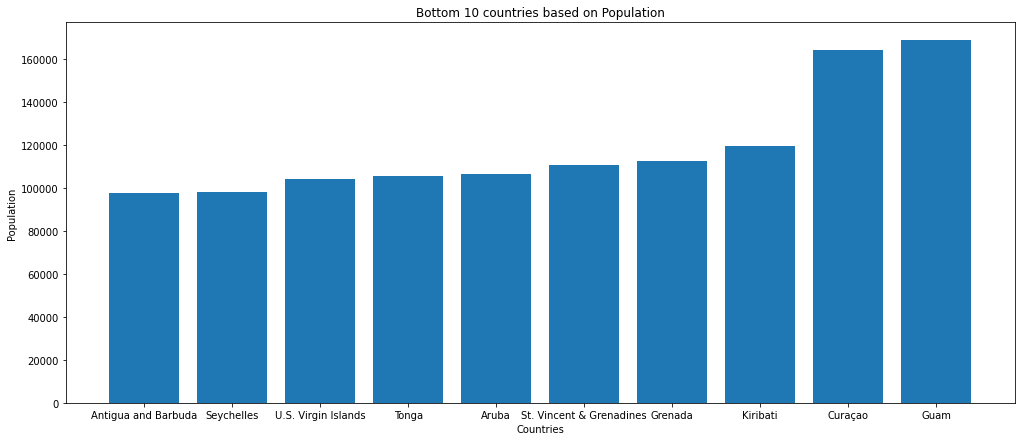

In [185]:
plt.figure(figsize=(17, 7))
plt.bar(SPcountry,Spopulation)
plt.title('Bottom 10 countries based on Population')
plt.xlabel("Countries")
plt.ylabel("Population")

# Conclusion

1. Analyzed the World Population based on varies attributes.

2. Changed the columns names and fixed the data formation and filled the null values.

3. Extracted  Top 10 Countries and bottom 10 based on Population,land area,fertility rate,density column data.

4. Sorted  the data lowest to highest for data frame based on population coulum data.

5. Created Distibution Plot for Population,Median Age,Urban population(%),Yearly Change(%).